# Basics of logistic regression

## Import the relevant libraries

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Load the data

In [2]:
raw_data = pd.read_csv(r'https://raw.githubusercontent.com/Cbhami/Coraline/master/Resources/csv%20data/user94403143_workout_history.csv')
raw_data.head(1)
raw_data.columns = raw_data.columns.str.strip()
raw_data['Distance (mi)'] = pd.to_numeric(raw_data['Distance (mi)'], errors='coerce')
raw_data['Workout Time (seconds)'] = pd.to_numeric(raw_data['Workout Time (seconds)'], errors='coerce')

In [3]:
# raw_data['Distance (mi)'] = raw_data['Distance (mi)'].astype(float)

In [4]:
#create my bins
bins = [0, 3.09, 6.19, 9.9, 13.09, 20]
bins2 = [0, 6.19, 20]
labels2 = ['No', 'Yes']
labels = ['Short', '5k', '10k', '10m', 'half-marathon']
raw_data['10k'] = pd.cut(raw_data['Distance (mi)'], bins=bins2, labels=labels2)
raw_data['Run_Type'] = pd.cut(raw_data['Distance (mi)'], bins=bins, labels=labels)

In [5]:
# Replace all No entries with 0, and all Yes entries with 1
data = raw_data.copy()
data['Run_Type_Binaryish'] = data['Run_Type'].map({'Short': 1, '5k': 2, '10k': 3, 'half-marathon':4})
data['10k2'] = data['10k'].map({'No': 0, 'Yes': 1})


In [6]:
data['Workout Date'] = pd.to_datetime(data['Workout Date'])
data['Date Submitted'] = pd.to_datetime(data['Date Submitted'])
mean_speed = data['Avg Heart Rate'].mean()
#temp['Avg_Heart_Rate'].fillna(value = mean_value, inplace = True)

#step_value = temp['Steps'].mean()
#temp['Steps'].fillna(value = step_value, inplace = True)
data['day_of_week']=data['Workout Date'].dt.day_name()
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 758 entries, 0 to 757
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Date Submitted          758 non-null    datetime64[ns]
 1   Workout Date            758 non-null    datetime64[ns]
 2   Activity Type           758 non-null    object        
 3   Calories Burned (kCal)  758 non-null    int64         
 4   Distance (mi)           758 non-null    float64       
 5   Workout Time (seconds)  758 non-null    int64         
 6   Avg Pace (min/mi)       758 non-null    float64       
 7   Max Pace (min/mi)       758 non-null    float64       
 8   Avg Speed (mi/h)        758 non-null    float64       
 9   Max Speed (mi/h)        758 non-null    float64       
 10  Avg Heart Rate          512 non-null    float64       
 11  Steps                   735 non-null    float64       
 12  Notes                   758 non-null    object    

In [7]:
data = data[data['Avg Pace (min/mi)'].between(4, 14.5)]

In [8]:
data.shape

(615, 20)

In [9]:
meanahr = data['Avg Heart Rate'].mean()
data['Avg Heart Rate'].fillna(value = meanahr, inplace = True)
#data.fillna(meanahr, inplace = True)

In [10]:
data2 = data.dropna()
data2 = data2.drop_duplicates()

In [11]:
data2.shape

(606, 20)

In [12]:
data.corr()

,Calories Burned (kCal),Distance (mi),Workout Time (seconds),Avg Pace (min/mi),Max Pace (min/mi),Avg Speed (mi/h),Max Speed (mi/h),Avg Heart Rate,Steps,Run_Type_Binaryish
Calories Burned (kCal),1.000000,0.975767,0.959380,0.206164,-0.077294,-0.215347,0.098933,0.193083,0.959718,0.849156
Distance (mi),0.975767,1.000000,0.972459,0.180323,-0.071835,-0.172583,0.112832,0.223727,0.980105,0.855390
Workout Time (seconds),0.959380,0.972459,1.000000,0.371024,-0.035824,-0.354185,0.147561,0.201425,0.980190,0.799138
Avg Pace (min/mi),0.206164,0.180323,0.371024,1.000000,0.098304,-0.944537,0.129593,0.038755,0.287960,0.052694
Max Pace (min/mi),-0.077294,-0.071835,-0.035824,0.098304,1.000000,-0.099361,-0.096808,0.039102,-0.095049,-0.082674
Avg Speed (mi/h),-0.215347,-0.172583,-0.354185,-0.944537,-0.099361,1.000000,-0.113145,-0.064017,-0.309567,-0.064396
Max Speed (mi/h),0.098933,0.112832,0.147561,0.129593,-0.096808,-0.113145,1.000000,0.004677,0.134079,0.073592
Avg Heart Rate,0.193083,0.223727,0.201425,0.038755,0.039102,-0.064017,0.004677,1.000000,0.207279,0.246656
Steps,0.959718,0.980105,0.980190,0.287960,-0.095049,-0.309567,0.134079,0.207279,1.000000,0.817844
Run_Type_Binaryish,0.849156,0.855390,0.799138,0.052694,-0.082674,-0.064396,0.073592,0.246656,0.817844,1.000000


## Variables

In [13]:
# Create the dependent and independent variables
y = data2['10k2']
x1 = data2['Calories Burned (kCal)']

In [14]:
y.shape

(606,)

In [15]:
x1.shape

(606,)

In [16]:
x = sm.add_constant(x1)
reg_log = sm.Logit(y,x)
results_log = reg_log.fit()
results_log.summary()

Optimization terminated successfully.
         Current function value: 0.063986
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   10k2   No. Observations:                  606
Model:                          Logit   Df Residuals:                      604
Method:                           MLE   Df Model:                            1
Date:                Sat, 24 Dec 2022   Pseudo R-squ.:                  0.8212
Time:                        02:46:19   Log-Likelihood:                -38.775
converged:                       True   LL-Null:                       -216.88
Covariance Type:            nonrobust   LLR p-value:                 1.886e-79
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                    -15.7632      2.087     -7.553      0.000     -19.854     -11.673
Calories Burned (kCal)     0.0213      0.003      7.604      0.000       0.016       0.027
==========================================================================================

Possibly complete quasi-separation: A fraction 0.21 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

## Let's plot the data

### Scatter plot

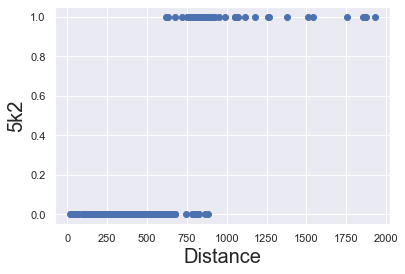

In [17]:
# Create a scatter plot of x1 (SAT, no constant) and y (Admitted)
plt.scatter(x1,y, color='C0')
# Don't forget to label your axes!
plt.xlabel('Distance', fontsize = 20)
plt.ylabel('5k2', fontsize = 20)
plt.show()

### Plot with a regression line

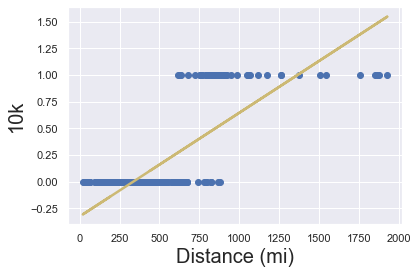

In [18]:
# Create a linear regression on the data in order to estimate the coefficients and be able to plot a regression line
# The data is not linear, so the linear regression doesn't make much sense
x = sm.add_constant(x1)
# I'll call it reg_lin, instead of reg, as we will be dealing with logistic regressions later on
reg_lin = sm.OLS(y,x)
# I'll segment it into regression and fitted regression (results) as I can use the results as an object for some operations
results_lin = reg_lin.fit()

# Create a scatter plot
plt.scatter(x1,y,color = 'C0')
# Plot the regression line. The coefficients are coming from results_lin.params
y_hat = x1*results_lin.params[1]+results_lin.params[0]
plt.plot(x1,y_hat,lw=2.5,color='C8')
plt.xlabel('Distance (mi)', fontsize = 20)
plt.ylabel('10k', fontsize = 20)
plt.show()

### Plot a logistic regression curve

Optimization terminated successfully.
         Current function value: 0.063986
         Iterations 10


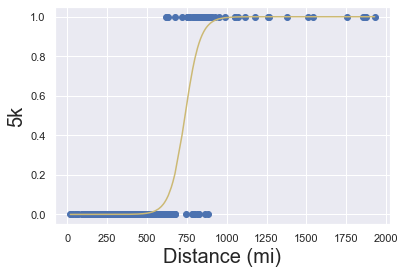

In [19]:
reg_log = sm.Logit(y,x)
results_log = reg_log.fit()

def f(x,b0,b1):
    return np.array(np.exp(b0+x*b1) / (1 + np.exp(b0+x*b1)))

f_sorted = np.sort(f(x1,results_log.params[0],results_log.params[1]))
x_sorted = np.sort(np.array(x1))

plt.scatter(x1,y,color='C0')
plt.xlabel('Distance (mi)', fontsize = 20)
plt.ylabel('5k', fontsize = 20)
plt.plot(x_sorted,f_sorted,color='C8')
plt.show()

Optimization terminated successfully.
         Current function value: 0.063986
         Iterations 10


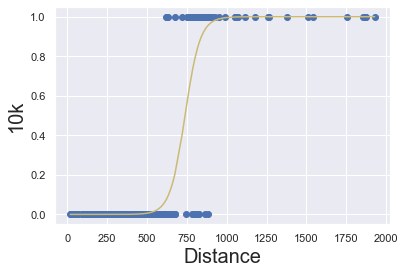

In [20]:
# Creating a logit regression (we will discuss this in another notebook)
reg_log = sm.Logit(y,x)
# Fitting the regression
results_log = reg_log.fit()

# Creating a logit function, depending on the input and coefficients
def f(x,b0,b1):
    return np.array(np.exp(b0+x*b1) / (1 + np.exp(b0+x*b1)))

# Sorting the y and x, so we can plot the curve
f_sorted = np.sort(f(x1,results_log.params[0],results_log.params[1]))
x_sorted = np.sort(np.array(x1))
plt.scatter(x1,y,color='C0')
plt.xlabel('Distance', fontsize = 20)
plt.ylabel('10k', fontsize = 20)
# Plotting the curve
plt.plot(x_sorted,f_sorted,color='C8')
plt.show()

## Log Reg Part 2

In [21]:
#Adding my additional estimators to see which model is the most accurate
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns



In [22]:
#This creates my dictionary of estimators
knn = KNeighborsClassifier() #default is k=5 nearest neighbors
estimators = {
    'KNeighborsClassifier': knn, 
    'SVC': SVC(),
    'GaussianNB': GaussianNB()}

In [23]:
data.columns

Index(['Date Submitted', 'Workout Date', 'Activity Type',
       'Calories Burned (kCal)', 'Distance (mi)', 'Workout Time (seconds)',
       'Avg Pace (min/mi)', 'Max Pace (min/mi)', 'Avg Speed (mi/h)',
       'Max Speed (mi/h)', 'Avg Heart Rate', 'Steps', 'Notes', 'Source',
       'Link', '10k', 'Run_Type', 'Run_Type_Binaryish', '10k2', 'day_of_week'],
      dtype='object')

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 615 entries, 0 to 753
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Date Submitted          615 non-null    datetime64[ns]
 1   Workout Date            615 non-null    datetime64[ns]
 2   Activity Type           615 non-null    object        
 3   Calories Burned (kCal)  615 non-null    int64         
 4   Distance (mi)           615 non-null    float64       
 5   Workout Time (seconds)  615 non-null    int64         
 6   Avg Pace (min/mi)       615 non-null    float64       
 7   Max Pace (min/mi)       615 non-null    float64       
 8   Avg Speed (mi/h)        615 non-null    float64       
 9   Max Speed (mi/h)        615 non-null    float64       
 10  Avg Heart Rate          615 non-null    float64       
 11  Steps                   614 non-null    float64       
 12  Notes                   615 non-null    object    

In [25]:
data.isnull().sum()

Date Submitted            0
Workout Date              0
Activity Type             0
Calories Burned (kCal)    0
Distance (mi)             0
Workout Time (seconds)    0
Avg Pace (min/mi)         0
Max Pace (min/mi)         0
Avg Speed (mi/h)          0
Max Speed (mi/h)          0
Avg Heart Rate            0
Steps                     1
Notes                     0
Source                    0
Link                      0
10k                       0
Run_Type                  0
Run_Type_Binaryish        8
10k2                      0
day_of_week               0
dtype: int64

In [26]:
data.dropna(inplace=True)

In [27]:
data.isnull().sum()

Date Submitted            0
Workout Date              0
Activity Type             0
Calories Burned (kCal)    0
Distance (mi)             0
Workout Time (seconds)    0
Avg Pace (min/mi)         0
Max Pace (min/mi)         0
Avg Speed (mi/h)          0
Max Speed (mi/h)          0
Avg Heart Rate            0
Steps                     0
Notes                     0
Source                    0
Link                      0
10k                       0
Run_Type                  0
Run_Type_Binaryish        0
10k2                      0
day_of_week               0
dtype: int64

In [28]:
dataframe = data[['Calories Burned (kCal)', 'Distance (mi)', 'Workout Time (seconds)',
       'Avg Pace (min/mi)', 'Max Pace (min/mi)', 'Avg Speed (mi/h)',
       'Max Speed (mi/h)','Steps']]
dataframetarget = data[['Run_Type_Binaryish']]

In [29]:
X_train, X_test, y_train, y_test = train_test_split(
    dataframe, dataframetarget, random_state=11)  # random_state for reproducibility

In [30]:
knn.fit(X=X_train, y=y_train)

/Users/cole/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [31]:
expected_labels = y_test #We also require our expected labels for future analysis.

In [32]:
predicted_labels = knn.predict(X=X_test)

In [33]:
print(predicted_labels[:20])

[2. 2. 3. 2. 3. 2. 2. 2. 1. 1. 2. 1. 2. 2. 1. 1. 2. 2. 2. 1.]


In [34]:
print(expected_labels[:20])

     Run_Type_Binaryish
156                 2.0
544                 2.0
51                  2.0
218                 1.0
542                 3.0
541                 2.0
750                 2.0
268                 2.0
605                 1.0
685                 1.0
34                  2.0
100                 1.0
493                 2.0
692                 2.0
688                 1.0
379                 1.0
205                 2.0
145                 2.0
114                 2.0
651                 1.0


In [35]:
wrong = [(p, e) for (p, e) in zip(predicted_labels, expected_labels) if p != e]

print(wrong)
print(f'The classifier incorrectly predicted {len(wrong)} of {len(expected_labels)} samples.')

[(2.0, 'Run_Type_Binaryish')]
The classifier incorrectly predicted 1 of 152 samples.


In [36]:
print(f'{knn.score(X_test, y_test):.2%}')

93.42%


In [37]:
confusion = confusion_matrix(y_true=expected_labels, y_pred=predicted_labels)

In [38]:
confusion

array([[42,  5,  0,  0],
       [ 3, 90,  2,  0],
       [ 0,  0,  9,  0],
       [ 0,  0,  0,  1]])

In [39]:
confusion_df = pd.DataFrame(confusion, index=range(4), columns=range(4))

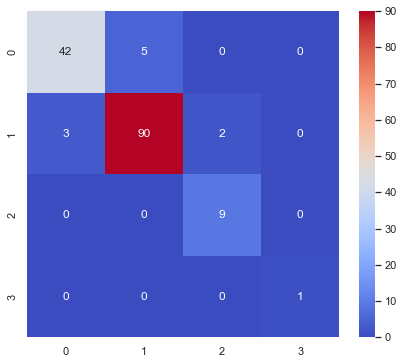

In [40]:
import seaborn as sns
figure = plt.figure(figsize=(7, 6))
axes = sns.heatmap(confusion_df, annot=True, 
                   cmap='coolwarm') 

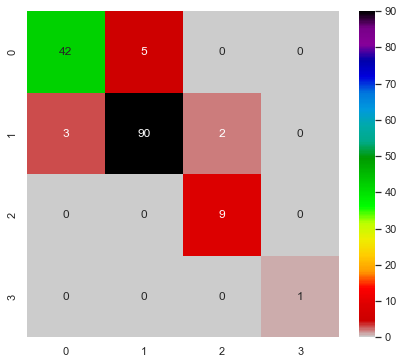

In [41]:
figure = plt.figure(figsize=(7, 6))
axes = sns.heatmap(confusion_df, annot=True, 
                   cmap='nipy_spectral_r') 

## K-Fold Class (2 Fold)

In [42]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


In [43]:
kfold = KFold(n_splits=2, random_state=11, shuffle=True)
scores = cross_val_score(estimator=knn, X=dataframe, y=dataframetarget, cv=kfold)

/Users/cole/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/cole/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [44]:
scores*100

array([89.7689769, 90.4290429])

In [45]:
print(f'Mean accuracy: {scores.mean():.2%}')

Mean accuracy: 90.10%


## K-Fold Class (20 Fold)

In [46]:
kfold = KFold(n_splits=20, random_state=11, shuffle=True)

In [47]:
scores = cross_val_score(estimator=knn, X=dataframe, y=dataframetarget, cv=kfold)

/Users/cole/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/cole/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/cole/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/cole/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expe

In [48]:
scores*100

array([ 93.5483871 ,  96.77419355,  96.77419355,  93.5483871 ,
        93.5483871 ,  80.64516129,  86.66666667,  90.        ,
        86.66666667,  93.33333333, 100.        ,  90.        ,
        83.33333333,  90.        ,  96.66666667,  93.33333333,
        93.33333333,  96.66666667,  90.        ,  90.        ])

In [49]:
print(f'Mean accuracy: {scores.mean():.2%}')

Mean accuracy: 91.74%


## Multiple Models

In [50]:
#Adding my additional estimators to see which model is the most accurate
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB


In [51]:
#This creates my dictionary of estimators
estimators = {
    'KNeighborsClassifier': knn, 
    'SVC': SVC(),
    'GaussianNB': GaussianNB()}

In [52]:
#This will run the estimator model for the three estimators below - KNN, SVC, GNB
for estimator_name, estimator_object in estimators.items():
    kfold = KFold(n_splits=10, random_state=11, shuffle=True)
    scores = cross_val_score(estimator=estimator_object, 
        X=dataframe, y=dataframetarget, cv=kfold)
    print(f'{estimator_name:>2}: ' + 
          f'mean accuracy={scores.mean():.2%}; ' +
          f'standard deviation={scores.std():.2%}')

KNeighborsClassifier: mean accuracy=91.43%; standard deviation=3.27%
SVC: mean accuracy=88.45%; standard deviation=4.18%
GaussianNB: mean accuracy=91.10%; standard deviation=3.76%


/Users/cole/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/cole/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/cole/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/cole/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expe

## Decision Tree Model

In [53]:
from sklearn.tree import DecisionTreeClassifier

In [54]:
X_train, X_test, y_train, y_test = train_test_split(dataframe, dataframetarget, random_state=0)

In [55]:
clf = DecisionTreeClassifier(max_depth = 2, 
                             random_state = 0)

In [56]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=0)

In [57]:
clf.predict(X_test.iloc[0].values.reshape(1, -1))

/Users/cole/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1.])

In [58]:
clf.predict(X_test[0:10])

array([1., 2., 1., 1., 3., 2., 2., 2., 2., 2.])

In [59]:
score = clf.score(X_test, y_test)
print(score)

0.9868421052631579


In [60]:
# List of values to try for max_depth:
max_depth_range = list(range(1, 6))

# List to store the average RMSE for each value of max_depth:
accuracy = []

for depth in max_depth_range:
    
    clf = DecisionTreeClassifier(max_depth = depth, 
                             random_state = 0)
    clf.fit(X_train, y_train)

    score = clf.score(X_test, y_test)
    accuracy.append(score)

/var/folders/91/qzryrsqs0vbcqrpddb7gb_c80000gn/T/ipykernel_42007/1914883130.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(y_ticklist)


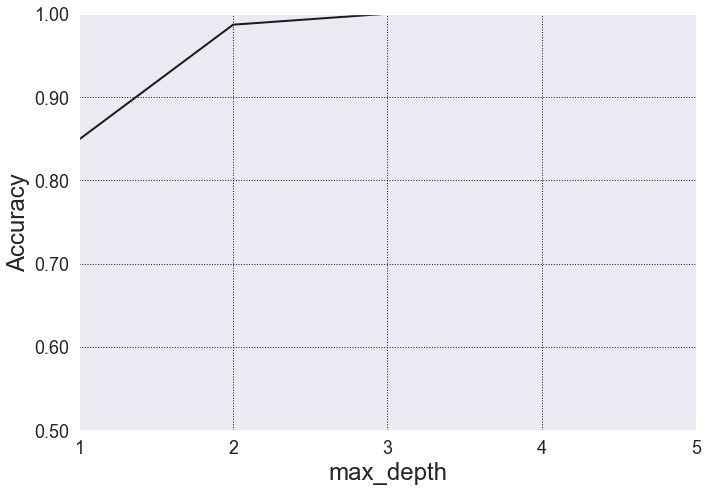

In [61]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (10,7));

ax.plot(max_depth_range,
        accuracy,
        lw=2,
        color='k')

ax.set_xlim([1, 5])
ax.set_ylim([.50, 1.00])
ax.grid(True,
        axis = 'both',
        zorder = 0,
        linestyle = ':',
        color = 'k')

yticks = ax.get_yticks()

y_ticklist = []
for tick in yticks:
    y_ticklist.append(str(tick).ljust(4, '0')[0:4])
ax.set_yticklabels(y_ticklist)
ax.tick_params(labelsize = 18)
ax.set_xticks([1,2,3,4,5])
ax.set_xlabel('max_depth', fontsize = 24)
ax.set_ylabel('Accuracy', fontsize = 24)
fig.tight_layout()
#fig.savefig('images/max_depth_vs_accuracy.png', dpi = 300)

## Decision Tree Visualization

### Load Packages

In [62]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

from sklearn import tree

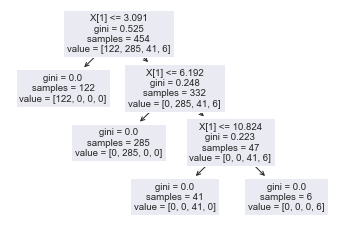

In [63]:
tree.plot_tree(clf);

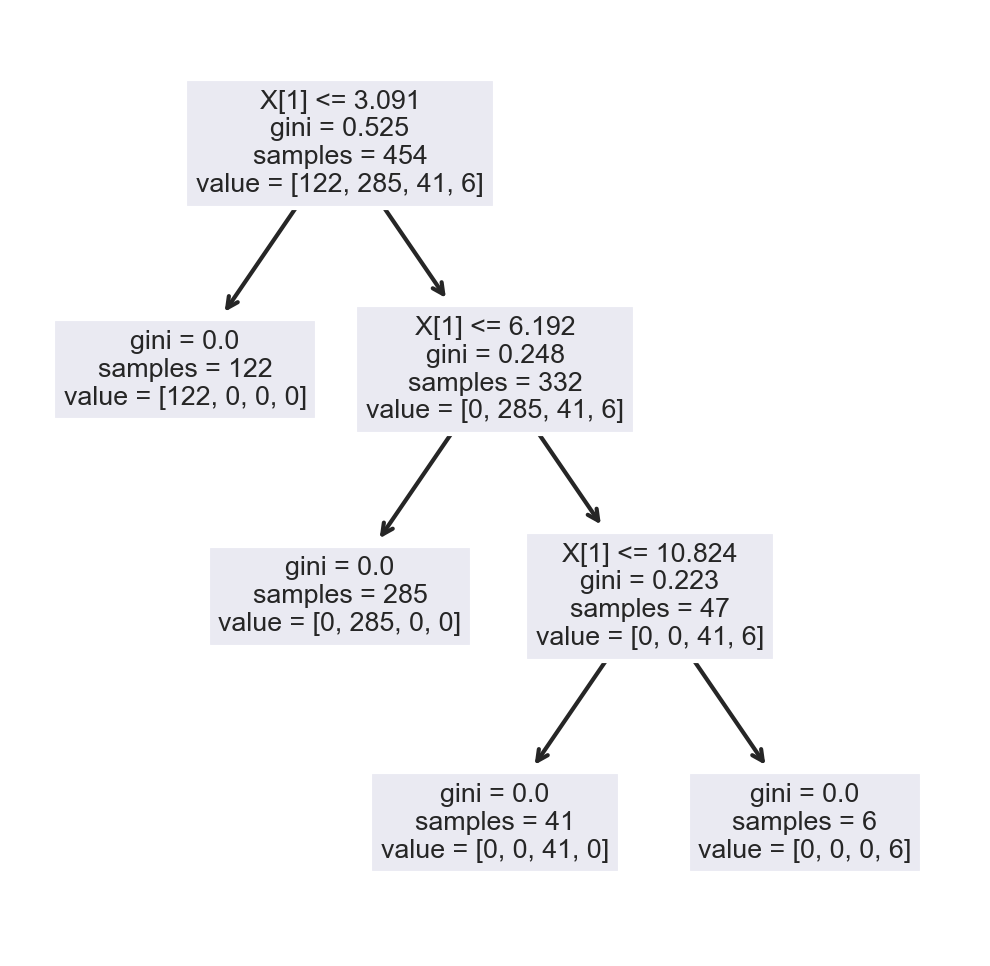

In [64]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (4,4), dpi = 300)

tree.plot_tree(clf);

In [65]:
dataframe.columns

Index(['Calories Burned (kCal)', 'Distance (mi)', 'Workout Time (seconds)',
       'Avg Pace (min/mi)', 'Max Pace (min/mi)', 'Avg Speed (mi/h)',
       'Max Speed (mi/h)', 'Steps'],
      dtype='object')

In [66]:
fn = ['Calories Burned (kCal)', 'Distance (mi)', 'Workout Time (seconds)',
       'Avg Pace (min/mi)', 'Max Pace (min/mi)', 'Avg Speed (mi/h)',
       'Max Speed (mi/h)', 'Steps', '10k2']
cn = ['Short Run', '5k', '10k', 'Half Marathon']

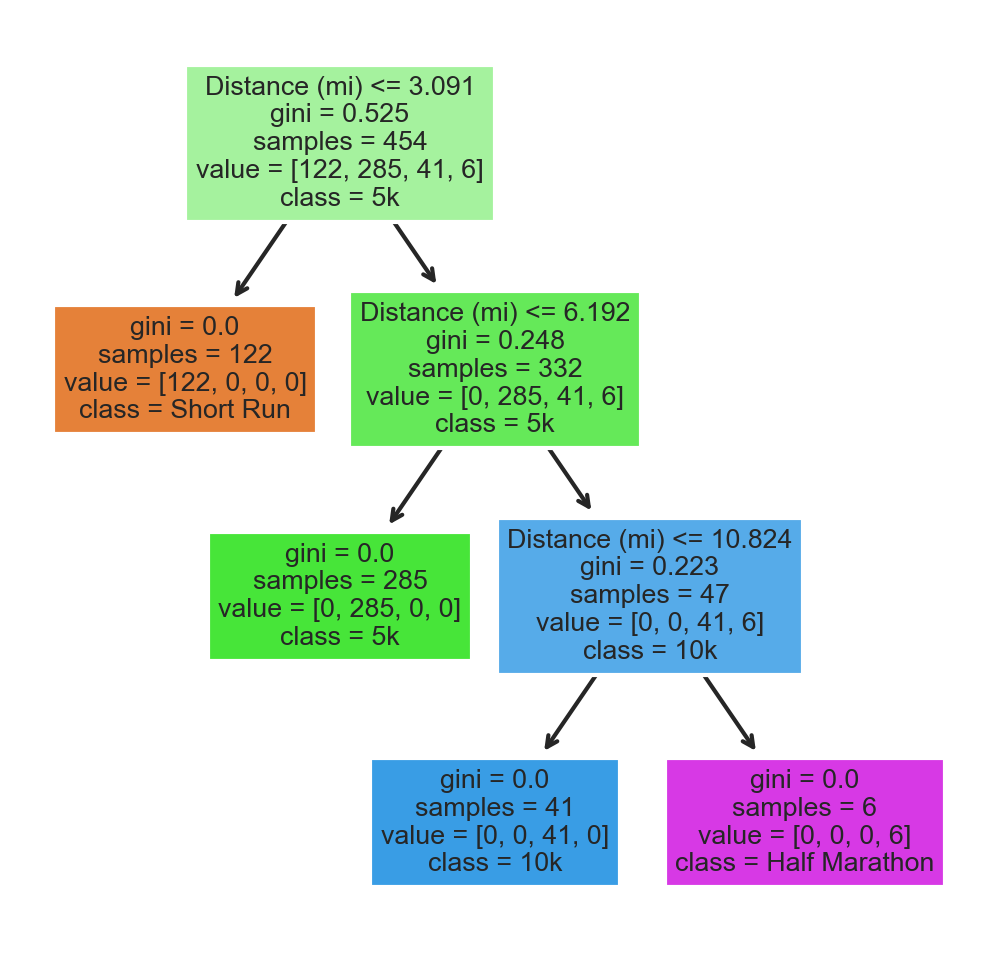

In [67]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (4,4), dpi = 300)

tree.plot_tree(clf,
               feature_names = fn, 
               class_names=cn,
               filled = True);
fig.savefig('plottreefncn.png')

## KNN 

### Load Packages

In [68]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans

In [69]:
# Store the feature data
X = dataframe
# store the target data
y = dataframetarget
Y = dataframetarget
# split the data using Scikit-Learn's train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

### Train the Data

In [70]:
X_train.shape

(454, 8)

In [71]:
X_test.shape

(152, 8)

In [72]:
y_train.shape

(454, 1)

In [73]:
y_test.shape

(152, 1)

In [74]:
dataframe.columns

Index(['Calories Burned (kCal)', 'Distance (mi)', 'Workout Time (seconds)',
       'Avg Pace (min/mi)', 'Max Pace (min/mi)', 'Avg Speed (mi/h)',
       'Max Speed (mi/h)', 'Steps'],
      dtype='object')

In [75]:
features = ['Calories Burned (kCal)','Steps']


In [76]:
x = StandardScaler().fit_transform(x)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


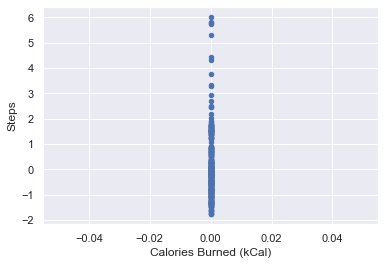

In [77]:
# Plot 
pd.DataFrame(x, columns = features).plot.scatter('Calories Burned (kCal)','Steps' )

# Add labels
plt.xlabel('Calories Burned (kCal)');
plt.ylabel('Steps');

In [78]:
# Make an instance of KMeans with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=1)

# Fit only on a features matrix
kmeans.fit(x)

KMeans(n_clusters=3, random_state=1)

In [79]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

In [80]:
x = pd.DataFrame(x, columns = features)

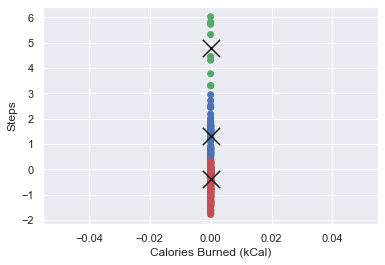

In [81]:
colormap = np.array(['r', 'g', 'b'])
plt.scatter(x['Calories Burned (kCal)'], x['Steps'], c=colormap[labels])
plt.scatter(centroids[:,0], centroids[:,1], s = 300, marker = 'x', c = 'k')

plt.xlabel('Calories Burned (kCal)');
plt.ylabel('Steps');

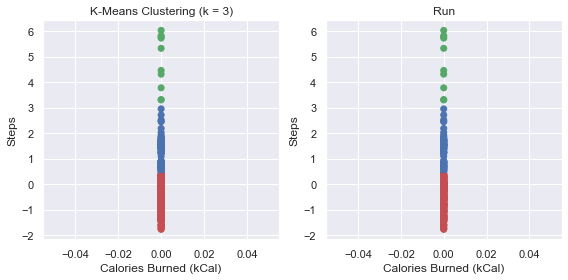

In [82]:
plt.figure(figsize=(8,4))

plt.subplot(1, 2, 1)
plt.scatter(x['Calories Burned (kCal)'], x['Steps'], c=colormap[labels])
plt.xlabel('Calories Burned (kCal)');
plt.ylabel('Steps');
plt.title('K-Means Clustering (k = 3)')
 
plt.subplot(1, 2, 2)
plt.scatter(x['Calories Burned (kCal)'], x['Steps'], c=colormap[labels])
plt.xlabel('Calories Burned (kCal)');
plt.ylabel('Steps');
plt.title('Run')

plt.tight_layout()

## Cluster Analysis

In [83]:
data.head(1)

,Date Submitted,Workout Date,Activity Type,Calories Burned (kCal),Distance (mi),Workout Time (seconds),Avg Pace (min/mi),Max Pace (min/mi),Avg Speed (mi/h),Max Speed (mi/h),Avg Heart Rate,Steps,Notes,Source,Link,10k,Run_Type,Run_Type_Binaryish,10k2,day_of_week
0,2022-12-04,2022-12-04,Run,440,3.1,2093,11.2527,1.56628,5.33206,38.3073,134.0,3227.0,b'',Map My Fitness MapMyRun iPhone,http://www.mapmyfitness.com/workout/6991488916,No,5k,2.0,0,Sunday


In [84]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

import pandas as pd, numpy as np, matplotlib.pyplot as plt, os, sys, seaborn as sns

In [85]:
round(data.describe(),2)

,Calories Burned (kCal),Distance (mi),Workout Time (seconds),Avg Pace (min/mi),Max Pace (min/mi),Avg Speed (mi/h),Max Speed (mi/h),Avg Heart Rate,Steps,Run_Type_Binaryish
count,606.00,606.00,606.00,606.00,606.00,606.00,606.00,606.00,606.00,606.00
mean,453.42,3.58,2128.46,9.79,1.51,6.21,50.26,125.06,5529.56,1.87
std,244.86,1.87,1260.54,1.21,2.77,0.67,141.01,44.01,3165.26,0.63
min,19.00,0.18,106.00,7.77,0.00,4.14,0.00,0.00,8.00,1.00
25%,348.50,3.00,1587.00,9.02,0.00,5.94,0.00,125.02,4171.25,1.00
50%,410.00,3.10,1801.50,9.61,0.82,6.24,19.13,125.02,4796.00,2.00
75%,476.00,4.00,2300.00,10.10,1.23,6.65,61.88,151.00,6140.50,2.00
max,1928.00,13.48,11065.00,14.48,31.95,7.72,1853.55,169.00,23604.00,4.00


In [86]:

df_uniques = pd.DataFrame([[i, len(data[i].unique())] for i in data.columns], columns=['Variable', 'Unique Values']).set_index('Variable')
df_uniques

,Unique Values
Variable,
Date Submitted,527
Workout Date,557
Activity Type,4
Calories Burned (kCal),331
Distance (mi),450
Workout Time (seconds),489
Avg Pace (min/mi),577
Max Pace (min/mi),386
Avg Speed (mi/h),579


In [87]:
binary_variables = list(df_uniques[df_uniques['Unique Values'] == 2].index)
binary_variables

['10k', '10k2']

In [88]:
categorical_variables = list(df_uniques[(6 >= df_uniques['Unique Values']) & (df_uniques['Unique Values'] > 2)].index)
categorical_variables

['Activity Type', 'Run_Type', 'Run_Type_Binaryish']

In [89]:
[[i, list(data[i].unique())] for i in categorical_variables]

[['Activity Type', ['Run', 'Indoor Run / Jog', 'Walk', 'Machine Workout']],
 ['Run_Type', ['5k', '10k', 'half-marathon', 'Short']],
 ['Run_Type_Binaryish', [2.0, 3.0, 4.0, 1.0]]]

In [90]:
ordinal_variables = ['Run', 'Walk']

In [91]:
data['day_of_week'].unique()

array(['Sunday', 'Saturday', 'Thursday', 'Wednesday', 'Tuesday', 'Monday',
       'Friday'], dtype=object)

In [92]:
ordinal_variables.append('day_of_week')

In [93]:
numeric_variables = list(set(data.columns) - set(ordinal_variables) - set(categorical_variables) - set(binary_variables))

array([[<AxesSubplot:title={'center':'Calories Burned (kCal)'}>,
        <AxesSubplot:title={'center':'Avg Heart Rate'}>,
        <AxesSubplot:title={'center':'Workout Date'}>],
       [<AxesSubplot:title={'center':'Avg Speed (mi/h)'}>,
        <AxesSubplot:title={'center':'Workout Time (seconds)'}>,
        <AxesSubplot:title={'center':'Max Speed (mi/h)'}>],
       [<AxesSubplot:title={'center':'Distance (mi)'}>,
        <AxesSubplot:title={'center':'Date Submitted'}>,
        <AxesSubplot:title={'center':'Max Pace (min/mi)'}>],
       [<AxesSubplot:title={'center':'Steps'}>,
        <AxesSubplot:title={'center':'Avg Pace (min/mi)'}>,
        <AxesSubplot:>]], dtype=object)

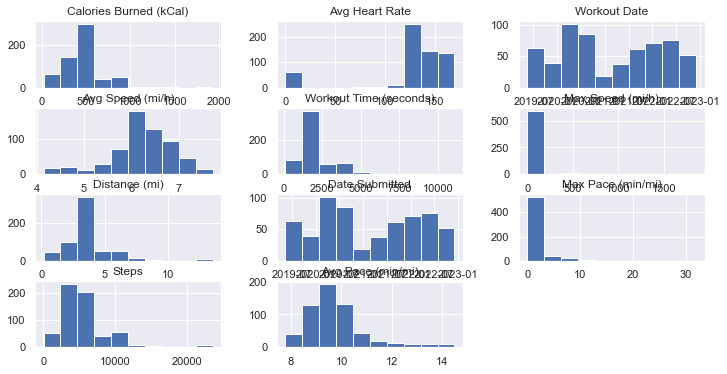

In [94]:
data[numeric_variables].hist(figsize=(12, 6))

In [95]:
# data['day_of_week'] = pd.cut(data['day_of_week'], bins=5)

Having set up the variables, remember that the K-nearest neighbors algorithm uses distance and hence requires scaled data.
Scale the data using one of the scaling methods discussed in the course.
Save the processed dataframe as a comma-separated file: 

In [96]:
from sklearn.preprocessing import LabelBinarizer, LabelEncoder, OrdinalEncoder

In [97]:
lb, le = LabelBinarizer(), LabelEncoder()

In [98]:
# for column in ordinal_variables:
#     data[column] = le.fit_transform(data[column])

In [99]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()

In [100]:
# for column in [ordinal_variables + numeric_variables]:
#     data[column] = mm.fit_transform(data[column])

In [101]:
### BEGIN SOLUTION
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score

In [102]:
df = data

In [103]:
df.info()
df.columns

<class 'pandas.core.frame.DataFrame'>
Int64Index: 606 entries, 0 to 753
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Date Submitted          606 non-null    datetime64[ns]
 1   Workout Date            606 non-null    datetime64[ns]
 2   Activity Type           606 non-null    object        
 3   Calories Burned (kCal)  606 non-null    int64         
 4   Distance (mi)           606 non-null    float64       
 5   Workout Time (seconds)  606 non-null    int64         
 6   Avg Pace (min/mi)       606 non-null    float64       
 7   Max Pace (min/mi)       606 non-null    float64       
 8   Avg Speed (mi/h)        606 non-null    float64       
 9   Max Speed (mi/h)        606 non-null    float64       
 10  Avg Heart Rate          606 non-null    float64       
 11  Steps                   606 non-null    float64       
 12  Notes                   606 non-null    object    

Index(['Date Submitted', 'Workout Date', 'Activity Type',
       'Calories Burned (kCal)', 'Distance (mi)', 'Workout Time (seconds)',
       'Avg Pace (min/mi)', 'Max Pace (min/mi)', 'Avg Speed (mi/h)',
       'Max Speed (mi/h)', 'Avg Heart Rate', 'Steps', 'Notes', 'Source',
       'Link', '10k', 'Run_Type', 'Run_Type_Binaryish', '10k2', 'day_of_week'],
      dtype='object')

In [104]:
df = df[['Calories Burned (kCal)', 'Distance (mi)', 'Workout Time (seconds)',
       'Avg Pace (min/mi)', 'Max Pace (min/mi)', 'Avg Speed (mi/h)',
       'Max Speed (mi/h)', 'Steps', '10k2']].round(0)

In [105]:
# Set up X and y variables
y, X = df['10k2'], df.drop(columns='10k2')
# Split the data into training and test samples
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [106]:
# Estimate KNN model and report outcomes
knn = KNeighborsClassifier(n_neighbors=3)
knn = knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
# Preciision, recall, f-score from the multi-class support function
print(classification_report(y_test, y_pred))
print('Accuracy score: ', round(accuracy_score(y_test, y_pred), 2))
print('F1 Score: ', round(f1_score(y_test, y_pred), 2))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99       214
           1       0.83      1.00      0.91        29

    accuracy                           0.98       243
   macro avg       0.91      0.99      0.95       243
weighted avg       0.98      0.98      0.98       243

Accuracy score:  0.98
F1 Score:  0.91


Text(0.5, 84.5, 'Ground Truth')

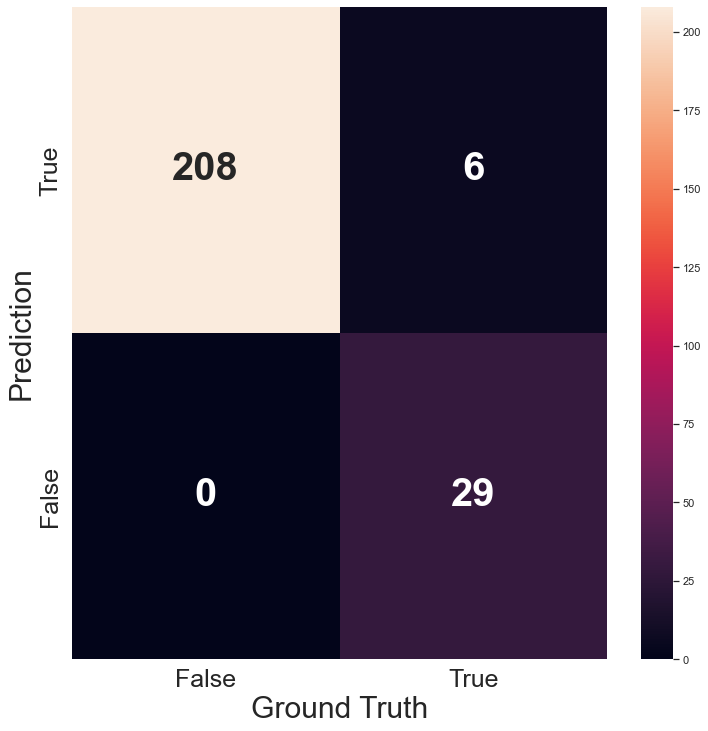

In [107]:
# Plot confusion matrix
sns.set_palette(sns.color_palette())
_, ax = plt.subplots(figsize=(12,12))
ax = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', annot_kws={"size": 40, "weight": "bold"})  
labels = ['False', 'True']
ax.set_xticklabels(labels, fontsize=25);
ax.set_yticklabels(labels[::-1], fontsize=25);
ax.set_ylabel('Prediction', fontsize=30);
ax.set_xlabel('Ground Truth', fontsize=30)
### END SOLUTION

Using the same split of training and test samples, estimate another K-Nearest Neighbors model.
This time, use K=5 and weight the results by distance.
Again, examine the Precision, Recall, F-1 Score, and Accuracy of the classification, and visualize the Confusion Matrix.

In [108]:
knn = KNeighborsClassifier(n_neighbors=5, weights='distance')
knn = knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
# Preciision, recall, f-score from the multi-class support function
print(classification_report(y_test, y_pred))
print('Accuracy score: ', round(accuracy_score(y_test, y_pred), 2))
print('F1 Score: ', round(f1_score(y_test, y_pred), 2))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99       214
           1       0.83      1.00      0.91        29

    accuracy                           0.98       243
   macro avg       0.91      0.99      0.95       243
weighted avg       0.98      0.98      0.98       243

Accuracy score:  0.98
F1 Score:  0.91


Text(0.5, 84.5, 'Ground Truth')

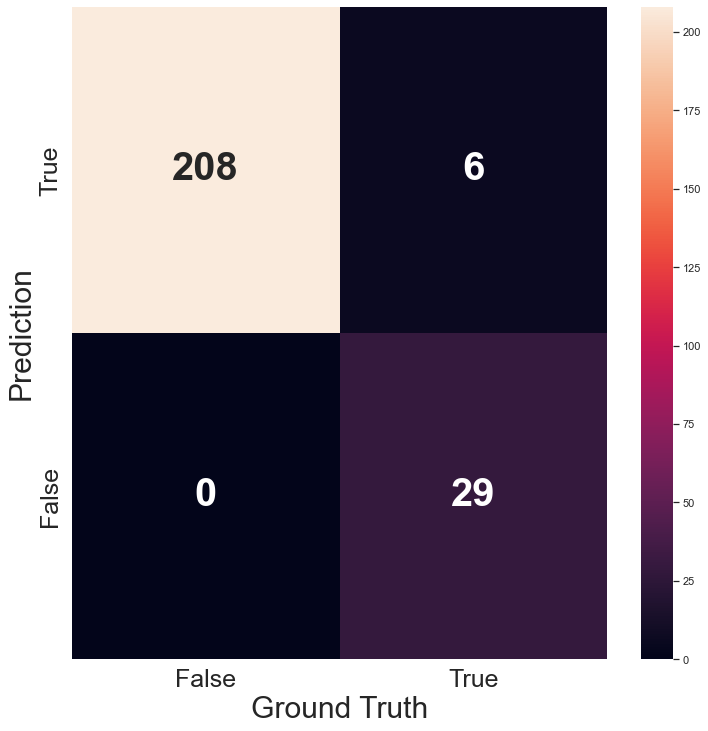

In [109]:
# Plot confusion matrix
_, ax = plt.subplots(figsize=(12,12))
ax = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', annot_kws={"size": 40, "weight": "bold"})  
labels = ['False', 'True']
ax.set_xticklabels(labels, fontsize=25);
ax.set_yticklabels(labels[::-1], fontsize=25);
ax.set_ylabel('Prediction', fontsize=30);
ax.set_xlabel('Ground Truth', fontsize=30)
### END SOLUTION

In [110]:
### BEGIN SOLUTION
max_k = 40
f1_scores = list()
error_rates = list() # 1-accuracy

for k in range(1, max_k):
    
    knn = KNeighborsClassifier(n_neighbors=k, weights='distance')
    knn = knn.fit(X_train, y_train)
    
    y_pred = knn.predict(X_test)
    f1 = f1_score(y_pred, y_test)
    f1_scores.append((k, round(f1_score(y_test, y_pred), 4)))
    error = 1-round(accuracy_score(y_test, y_pred), 4)
    error_rates.append((k, error))
    
f1_results = pd.DataFrame(f1_scores, columns=['K', 'F1 Score'])
error_results = pd.DataFrame(error_rates, columns=['K', 'Error Rate'])

<Figure size 1800x1200 with 0 Axes>

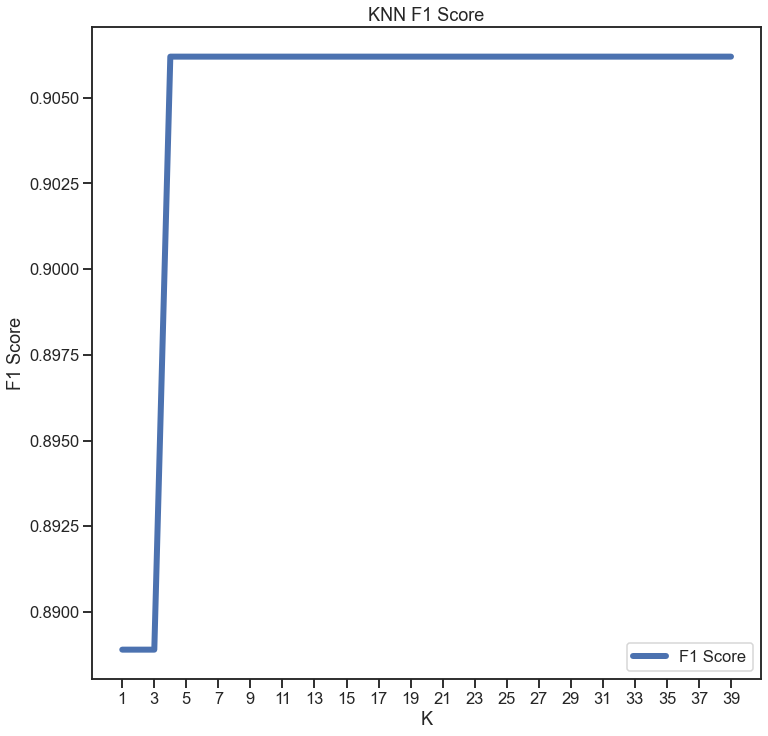

In [111]:
# Plot F1 results
sns.set_context('talk')
sns.set_style('ticks')

plt.figure(dpi=300)
ax = f1_results.set_index('K').plot(figsize=(12, 12), linewidth=6)
ax.set(xlabel='K', ylabel='F1 Score')
ax.set_xticks(range(1, max_k, 2));
plt.title('KNN F1 Score')
plt.savefig('knn_f1.png')

<Figure size 1800x1200 with 0 Axes>

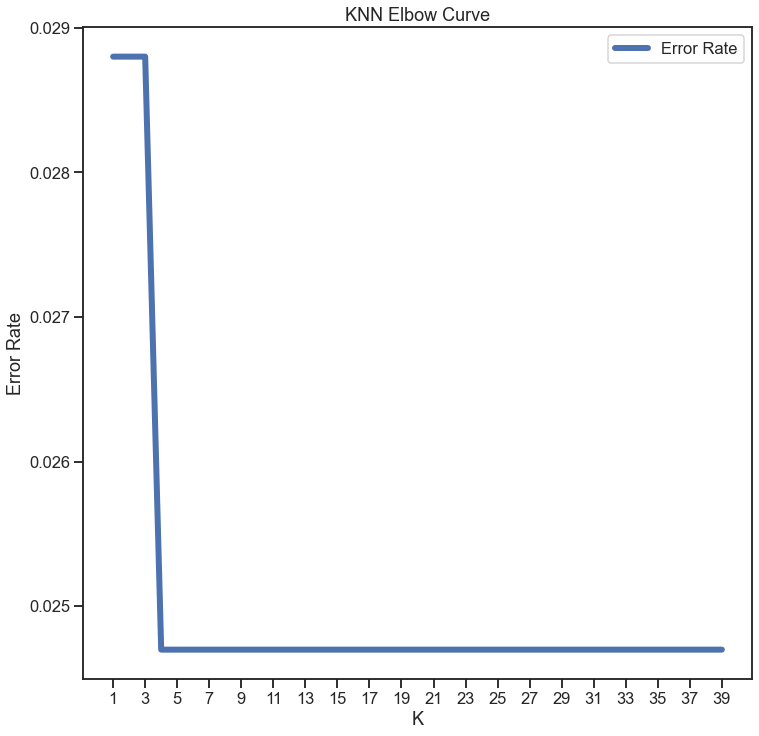

In [112]:
# Plot Accuracy (Error Rate) results
sns.set_context('talk')
sns.set_style('ticks')

plt.figure(dpi=300)
ax = error_results.set_index('K').plot(figsize=(12, 12), linewidth=6)
ax.set(xlabel='K', ylabel='Error Rate')
ax.set_xticks(range(1, max_k, 2))
plt.title('KNN Elbow Curve')
plt.savefig('knn_elbow.png')
### END SOLUTION

## KNN

In [113]:
data2 = data[['Calories Burned (kCal)', 'Workout Time (seconds)', 'Avg Pace (min/mi)', 'Max Pace (min/mi)', 'Avg Speed (mi/h)', 'Max Speed (mi/h)', 'Steps', 'Distance (mi)', '10k2']]

In [114]:
X = data2.iloc[:, :-1]
y = data2.iloc[:, -1:]

In [115]:
X.describe()

,Calories Burned (kCal),Workout Time (seconds),Avg Pace (min/mi),Max Pace (min/mi),Avg Speed (mi/h),Max Speed (mi/h),Steps,Distance (mi)
count,606.000000,606.000000,606.000000,606.000000,606.000000,606.000000,606.000000,606.000000
mean,453.417492,2128.457096,9.791078,1.508342,6.209723,50.255352,5529.557756,3.577462
std,244.857723,1260.541149,1.208688,2.772808,0.673730,141.010295,3165.262022,1.865074
min,19.000000,106.000000,7.774190,0.000000,4.144070,0.000000,8.000000,0.178743
25%,348.500000,1587.000000,9.017798,0.000000,5.940890,0.000000,4171.250000,3.002957
50%,410.000000,1801.500000,9.614045,0.815149,6.240870,19.131200,4796.000000,3.100000
75%,476.000000,2300.000000,10.099500,1.227593,6.653507,61.881800,6140.500000,4.000000
max,1928.000000,11065.000000,14.478500,31.954800,7.717840,1853.550000,23604.000000,13.481600


In [116]:
y.value_counts(normalize=True)

10k2
0       0.884488
1       0.115512
dtype: float64

<AxesSubplot:xlabel='10k2'>

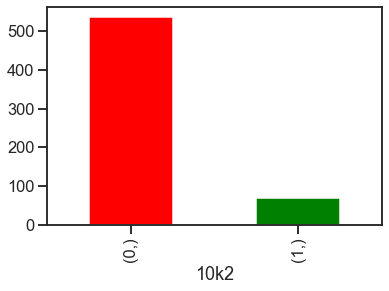

In [117]:
y.value_counts().plot.bar(color=['red', 'green'])

In [118]:
# Split 80% as training dataset
# and 20% as testing dataset
rs=123
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state = rs)

Training a KNN classifier is very similar to training other classifiers in `sklearn`, we first need to define a `KNeighborsClassifier` object. Here we use `n_neighbors=2` argument to specify how many neighbors will be used for prediction, and we keep other arguments to be their default values.


In [119]:
# Define a KNN classifier with `n_neighbors=2`
knn_model = KNeighborsClassifier(n_neighbors=2)

In [120]:
knn_model.fit(X_train, y_train.values.ravel())

KNeighborsClassifier(n_neighbors=2)

In [121]:
preds = knn_model.predict(X_test)

In [122]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
# Evaluation metrics related methods
from sklearn.metrics import classification_report, accuracy_score, f1_score, confusion_matrix, precision_recall_fscore_support, precision_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [123]:
def evaluate_metrics(yt, yp):
    results_pos = {}
    results_pos['accuracy'] = accuracy_score(yt, yp)
    precision, recall, f_beta, _ = precision_recall_fscore_support(yt, yp, average='micro')
    results_pos['recall'] = recall
    results_pos['precision'] = precision
    results_pos['f1score'] = f_beta
    return results_pos

In [124]:
evaluate_metrics(y_test, preds)

{'accuracy': 0.9836065573770492,
 'recall': 0.9836065573770492,
 'precision': 0.9836065573770492,
 'f1score': 0.9836065573770492}

In [125]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train.values.ravel())
preds = model.predict(X_test)
evaluate_metrics(y_test, preds)

{'accuracy': 0.9836065573770492,
 'recall': 0.9836065573770492,
 'precision': 0.9836065573770492,
 'f1score': 0.9836065573770492}

In [126]:
# Try K from 1 to 50
max_k = 50
# Create an empty list to store f1score for each k
f1_scores = []

In [127]:
for k in range(1, max_k + 1):
    # Create a KNN classifier
    knn = KNeighborsClassifier(n_neighbors=k)
    # Train the classifier
    knn = knn.fit(X_train, y_train.values.ravel())
    preds = knn.predict(X_test)
    # Evaluate the classifier with f1score
    f1 = f1_score(preds, y_test)
    f1_scores.append((k, round(f1_score(y_test, preds), 4)))
# Convert the f1score list to a dataframe
f1_results = pd.DataFrame(f1_scores, columns=['K', 'F1 Score'])
f1_results.set_index('K')

,F1 Score
K,
1,0.9655
2,0.9231
3,0.9286
4,0.9286
5,0.9333
6,0.8462
7,0.9286
8,0.9286
9,0.9655


Text(0.5, 1.0, 'KNN F1 Score')

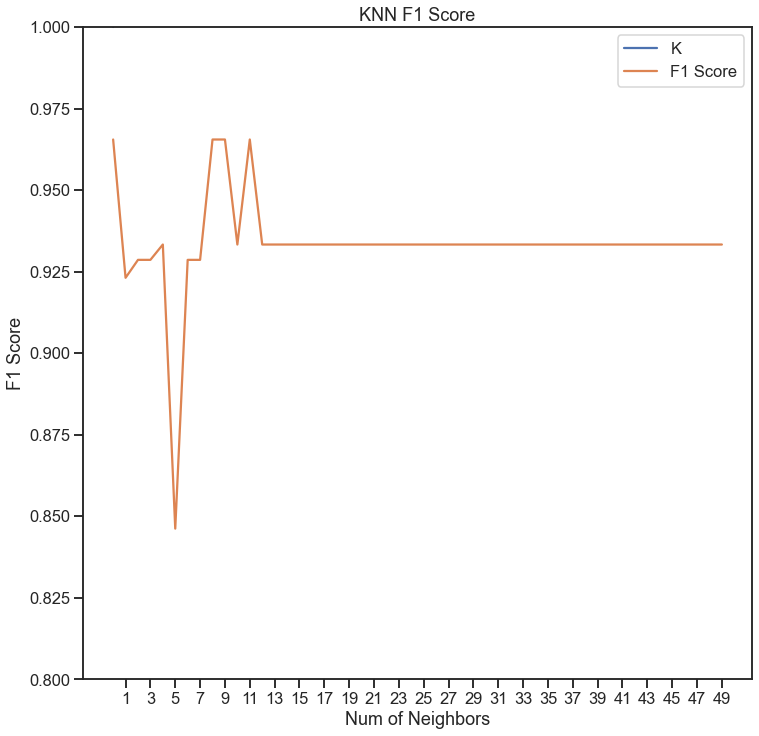

In [128]:
# Plot F1 results
ax = f1_results.plot(figsize=(12, 12))
ax.set(xlabel='Num of Neighbors', ylabel='F1 Score')
ax.set_xticks(range(1, max_k, 2));
plt.ylim((0.80, 1))
plt.title('KNN F1 Score')

## Random Forest

In [129]:
data.columns

Index(['Date Submitted', 'Workout Date', 'Activity Type',
       'Calories Burned (kCal)', 'Distance (mi)', 'Workout Time (seconds)',
       'Avg Pace (min/mi)', 'Max Pace (min/mi)', 'Avg Speed (mi/h)',
       'Max Speed (mi/h)', 'Avg Heart Rate', 'Steps', 'Notes', 'Source',
       'Link', '10k', 'Run_Type', 'Run_Type_Binaryish', '10k2', 'day_of_week'],
      dtype='object')

In [130]:
data = data[['Activity Type',
       'Calories Burned (kCal)', 'Distance (mi)', 'Workout Time (seconds)',
       'Avg Pace (min/mi)', 'Max Pace (min/mi)', 'Avg Speed (mi/h)',
       'Max Speed (mi/h)', 'Avg Heart Rate', 'Steps', 'Notes', 'Source',
       'Link', 'Run_Type', '10k2', '10k', 'Run_Type_Binaryish', 'day_of_week']]

In [131]:
data.describe()

,Calories Burned (kCal),Distance (mi),Workout Time (seconds),Avg Pace (min/mi),Max Pace (min/mi),Avg Speed (mi/h),Max Speed (mi/h),Avg Heart Rate,Steps,Run_Type_Binaryish
count,606.000000,606.000000,606.000000,606.000000,606.000000,606.000000,606.000000,606.000000,606.000000,606.000000
mean,453.417492,3.577462,2128.457096,9.791078,1.508342,6.209723,50.255352,125.056776,5529.557756,1.867987
std,244.857723,1.865074,1260.541149,1.208688,2.772808,0.673730,141.010295,44.014238,3165.262022,0.631722
min,19.000000,0.178743,106.000000,7.774190,0.000000,4.144070,0.000000,0.000000,8.000000,1.000000
25%,348.500000,3.002957,1587.000000,9.017798,0.000000,5.940890,0.000000,125.020305,4171.250000,1.000000
50%,410.000000,3.100000,1801.500000,9.614045,0.815149,6.240870,19.131200,125.020305,4796.000000,2.000000
75%,476.000000,4.000000,2300.000000,10.099500,1.227593,6.653507,61.881800,151.000000,6140.500000,2.000000
max,1928.000000,13.481600,11065.000000,14.478500,31.954800,7.717840,1853.550000,169.000000,23604.000000,4.000000


for col in ['hypertension','heart_disease','stroke']:
 stroke_data_replaced[col]=stroke_data_replaced[col].replace([0,1],['No','Yes'])

In [132]:
categorical_col=[]
numerical_col=[]
for col in data.dtypes.index:
    if data[col].dtype == 'object':
        categorical_col.append(col)
    else:
        numerical_col.append(col)


In [133]:

print("Numerical Columns in DataFrame are :",numerical_col, '\n')
print("Categorical Columns in DataFrame are :",categorical_col)


Numerical Columns in DataFrame are : ['Calories Burned (kCal)', 'Distance (mi)', 'Workout Time (seconds)', 'Avg Pace (min/mi)', 'Max Pace (min/mi)', 'Avg Speed (mi/h)', 'Max Speed (mi/h)', 'Avg Heart Rate', 'Steps', 'Run_Type', '10k2', '10k', 'Run_Type_Binaryish'] 

Categorical Columns in DataFrame are : ['Activity Type', 'Notes', 'Source', 'Link', 'day_of_week']


In [134]:
data = data[['Calories Burned (kCal)', 'Distance (mi)', 'Workout Time (seconds)', 'Avg Pace (min/mi)', 'Max Pace (min/mi)', 'Avg Speed (mi/h)', 'Max Speed (mi/h)', 'Avg Heart Rate', 'Steps', 'Run_Type', 'Run_Type_Binaryish']]

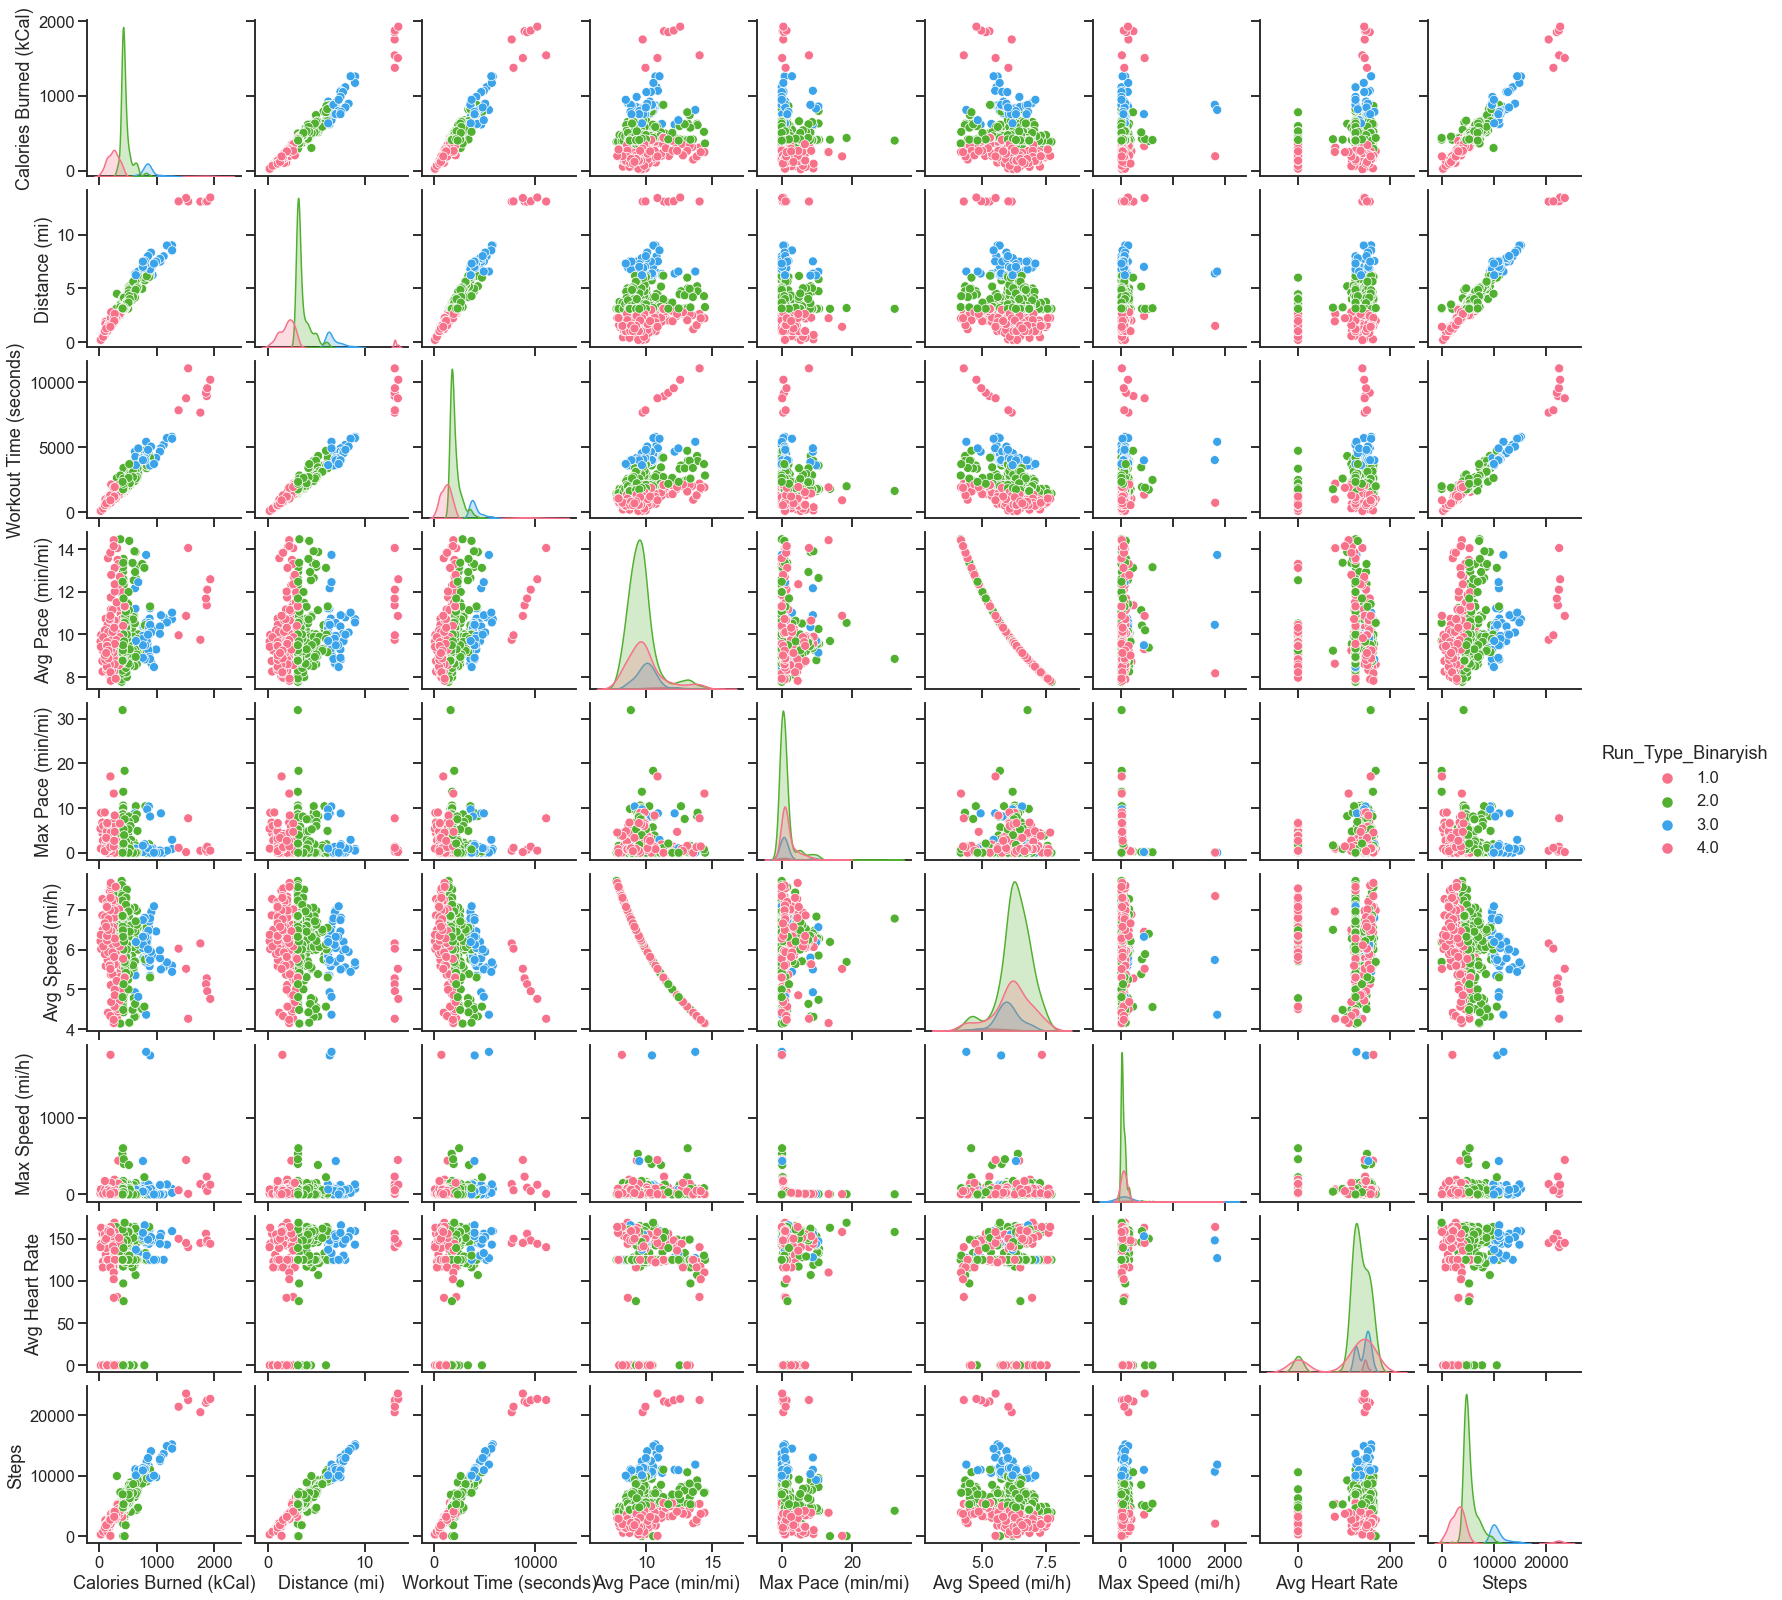

In [135]:
sns.pairplot(data,hue='Run_Type_Binaryish',palette='husl')


In [136]:
pd.DataFrame([[i, len(data[i].unique())] for i in data.columns],
             columns=['Variable', 'Unique Values']).set_index('Variable')

,Unique Values
Variable,
Calories Burned (kCal),331
Distance (mi),450
Workout Time (seconds),489
Avg Pace (min/mi),577
Max Pace (min/mi),386
Avg Speed (mi/h),579
Max Speed (mi/h),387
Avg Heart Rate,58
Steps,553


In [137]:
num_missing = data.isnull().sum()
percentage_missing = data.isnull().sum().apply(lambda x: x/data.shape[0]*100)

In [138]:
missing_data = pd.DataFrame({'Number of Missing':  num_missing,
                             'Percentage of Missing': percentage_missing})

missing_data['Percentage of Missing'].sort_values(ascending = False)

Calories Burned (kCal)    0.0
Distance (mi)             0.0
Workout Time (seconds)    0.0
Avg Pace (min/mi)         0.0
Max Pace (min/mi)         0.0
Avg Speed (mi/h)          0.0
Max Speed (mi/h)          0.0
Avg Heart Rate            0.0
Steps                     0.0
Run_Type                  0.0
Run_Type_Binaryish        0.0
Name: Percentage of Missing, dtype: float64

In [139]:
from collections import Counter

In [140]:
def detect_outlier(df,num_cols,outlier_in_row=2):
    outlier_indices=[]
    for col in num_cols:
        Q1=np.percentile(df[col],25)
        Q3=np.percentile(df[col],75)
        IQR=Q3-Q1
        step_size=1.5 * IQR
        outlier_indices.extend(df[(df[col]<Q1-step_size) | (df[col]>Q3+step_size)].index)
    outlier_indices=Counter(outlier_indices)
    multiple_outliers=[k for k,v in outlier_indices.items() if v> outlier_in_row]
    return multiple_outliers


    


In [141]:
drop_outliers=detect_outlier(data,['Calories Burned (kCal)', 'Distance (mi)', 'Workout Time (seconds)', 'Avg Pace (min/mi)', 'Max Pace (min/mi)', 'Avg Speed (mi/h)', 'Max Speed (mi/h)', 'Avg Heart Rate', 'Steps'],2)

In [142]:
data.loc[drop_outliers]

,Calories Burned (kCal),Distance (mi),Workout Time (seconds),Avg Pace (min/mi),Max Pace (min/mi),Avg Speed (mi/h),Max Speed (mi/h),Avg Heart Rate,Steps,Run_Type,Run_Type_Binaryish
1,762,6.21098,3854,10.33860,0.519991,5.80350,115.38700,153.0,10072.0,10k,3.0
2,769,6.26321,3884,10.33400,0.905183,5.80608,66.28490,147.0,10292.0,10k,3.0
11,1756,13.10000,7665,9.75191,0.445702,6.15264,134.61900,145.0,20519.0,half-marathon,4.0
16,815,6.25655,3977,10.59350,0.881546,5.66386,68.06220,151.0,10532.0,10k,3.0
19,1867,13.10000,8937,11.37020,0.259192,5.27694,231.48900,146.0,22295.0,half-marathon,4.0
...,...,...,...,...,...,...,...,...,...,...,...
337,410,3.15417,2491,13.16230,0.099874,4.55848,600.75800,0.0,5378.0,5k,2.0
617,332,2.60421,2099,13.31850,0.432320,4.50501,138.78600,0.0,4530.0,Short,1.0
653,265,2.03220,1602,13.13030,1.541920,4.56957,38.91260,0.0,3612.0,Short,1.0
741,249,2.21734,1921,14.43370,13.253900,4.15693,4.52698,110.0,3887.0,Short,1.0


In [143]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 606 entries, 0 to 753
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   Calories Burned (kCal)  606 non-null    int64   
 1   Distance (mi)           606 non-null    float64 
 2   Workout Time (seconds)  606 non-null    int64   
 3   Avg Pace (min/mi)       606 non-null    float64 
 4   Max Pace (min/mi)       606 non-null    float64 
 5   Avg Speed (mi/h)        606 non-null    float64 
 6   Max Speed (mi/h)        606 non-null    float64 
 7   Avg Heart Rate          606 non-null    float64 
 8   Steps                   606 non-null    float64 
 9   Run_Type                606 non-null    category
 10  Run_Type_Binaryish      606 non-null    float64 
dtypes: category(1), float64(8), int64(2)
memory usage: 69.0 KB


In [144]:
train_df=data.drop(drop_outliers,axis=0).reset_index(drop=True)

In [145]:
test_df = data.Run_Type_Binaryish

In [146]:
dataset=pd.concat([train_df,test_df],axis=0).reset_index(drop=True)

In [147]:
dataset=dataset.fillna(np.nan)
dataset.isnull().sum()

Calories Burned (kCal)    606
Distance (mi)             606
Workout Time (seconds)    606
Avg Pace (min/mi)         606
Max Pace (min/mi)         606
Avg Speed (mi/h)          606
Max Speed (mi/h)          606
Avg Heart Rate            606
Steps                     606
Run_Type                  606
Run_Type_Binaryish        606
0                         479
dtype: int64

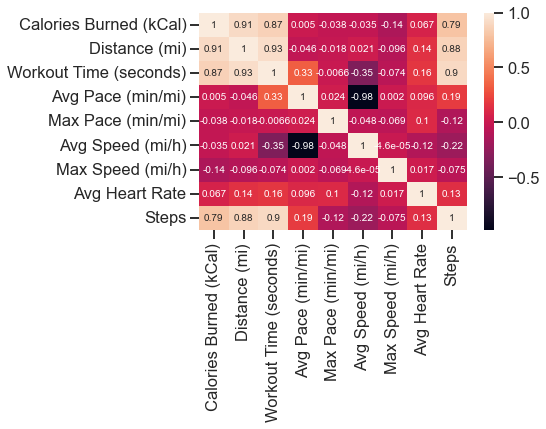

In [148]:
# Correlation Matrix of Numeric Variables
g=sns.heatmap(train_df[['Calories Burned (kCal)', 'Distance (mi)', 'Workout Time (seconds)', 'Avg Pace (min/mi)', 'Max Pace (min/mi)', 'Avg Speed (mi/h)', 'Max Speed (mi/h)', 'Avg Heart Rate', 'Steps']].corr(),annot=True)

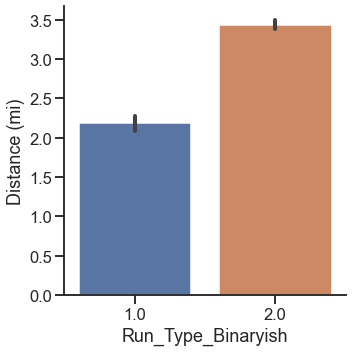

In [149]:
g=sns.catplot(x='Run_Type_Binaryish',y='Distance (mi)',data=train_df,kind="bar")

In [150]:
import os

# os.chdir("../input/titanic")

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

#For Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
from collections import Counter
# For Modeling
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier,ExtraTreesClassifier,VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold,GridSearchCV,cross_val_score,learning_curve
sns.set(style='white',context='notebook',palette='deep')

In [151]:
random_state=1
classifiers=[]
classifiers.append(SVC(random_state=random_state))
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state)
                                      ,random_state=random_state,learning_rate=0.1))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(ExtraTreesClassifier(random_state=random_state))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(KNeighborsClassifier())
classifiers.append(LogisticRegression(random_state=random_state))

cv_results=[]

for classifier in classifiers:
    cv_results.append(cross_val_score(classifier,X=X_train,y=y_train,scoring="accuracy",cv=kfold,n_jobs=-1))

cv_means=[]
cv_std=[]
for i in cv_results:
    cv_means.append(i.mean())
    cv_std.append(i.std())
cv_res=pd.DataFrame({"cross_val_means":cv_means,"cross_val_std":cv_std,
                     "Algorithm":["SVC","DecisionTree","Adabosst","RandomForest","Extratree","GradientBoost","Kneighbours","LR"]})

/Users/cole/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/cole/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/cole/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/cole/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Ple

In [152]:
train=dataset[:len(train_df)]
test=dataset[len(train_df):]
test.drop(labels="Run_Type_Binaryish",axis=1,inplace=True)

In [153]:
train["Run_Type_Binaryish"]=train["Run_Type_Binaryish"].astype(int)
Y_train=train["Run_Type_Binaryish"]
X_train=train.drop(labels="Run_Type_Binaryish",axis=1)

In [154]:
kfold=StratifiedKFold(n_splits=10)

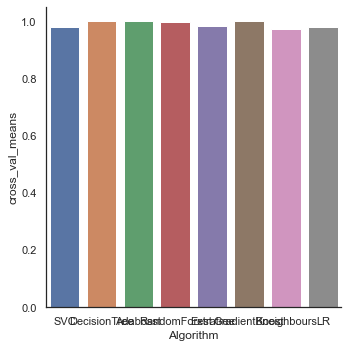

In [155]:
g=sns.catplot(x="Algorithm",y="cross_val_means",data=cv_res,kind="bar")

In [156]:
cv_res

,cross_val_means,cross_val_std,Algorithm
0,0.979464,0.020409,SVC
1,1.000000,0.000000,DecisionTree
2,1.000000,0.000000,Adabosst
3,0.995876,0.008249,RandomForest
4,0.983461,0.018134,Extratree
5,1.000000,0.000000,GradientBoost
6,0.973214,0.013084,Kneighbours
7,0.979422,0.020495,LR


In [157]:
# decision_tree=DecisionTreeClassifier()
# adadecision=AdaBoostClassifier(decision_tree,random_state=random_state)
# ada_param_grid={"base_estimator__criterion":["gini","entropy"],
#                "base_estimator__splitter":["best","random"],
#                "algorithm":["SAMME","SAMME.R"],
#                "n_estimators":[1,2,50,100,200],
#                "learning_rate":[0.0001,0.001,0.01,0.1,0.2,0.3]}

# grid_serarch=GridSearchCV(adadecision,param_grid=ada_param_grid,cv=kfold,
#                           scoring="accuracy",n_jobs=-1,verbose=1)
# grid_serarch.fit(X_train,Y_train)
# ada_best=grid_serarch.best_estimator_

In [158]:
# RFC=RandomForestClassifier()
# rfc_grid={"bootstrap":[True,False],
#           "n_estimators":[100,200,300,400,500]
#          }
# grid_serach_rf=GridSearchCV(RFC,rfc_grid,cv=kfold,n_jobs=-1,scoring="accuracy",verbose=-1)
# grid_serach_rf.fit(X_train,Y_train)
# rf_best=grid_serach_rf.best_estimator_
# grid_serach_rf.best_score_